By Amy Weng

Latent Dirichlet Allocation (LDA) topic modeling code adapted in part from Heidi Smith's Topic_Model_Attempt_1.ipynb. Word cloud generation code comes from Heidi's Word_Clouds.ipynb. 

pyLDAvis Visualization comes from this article: https://towardsdatascience.com/end-to-end-topic-modeling-in-python-latent-dirichlet-allocation-lda-35ce4ed6b3e0

In [2]:
import pandas as pd
import re

import gensim
import gensim.corpora as corpora
from words import remove_stopwords
from words import stop_words

In [8]:
# lexicons
publica = 'abroad|act|administrators|admiral|adventurers|africa|african|aid|ally|ambaador|ambassador|amboyna|amsterdam|argier|army|austerity|authority|bank|bankrupt|bankrupts|banks|bantam|bavaria|bill|bills|body politic|bond|britain|bullion|bullionist|calico|calicoes|captain|cargo|cargoes|cent|cents|charles|charters|china|chocolate|christiandom|cinnamon|citizens|civil war|civilian|clothier|clothiers|cloths|coffee|coin|coined|commerce|commercial|commiioner|commissioner|commissioners|commodities|commodity|commonwealth|companies|company|constitution|consumables|consume|consumer|consuming|consumption|controversies|controversy|conume|conumption|copper|corn|corporate|corporation|council|councils|country|court|courten|courts|credit|creditor|creditors|crisis|crisis|currency|debt|debtor|decoctor|decree|decrees|defendant|dutch|duties|east india company|east indies|east-india company|east-india-company|eat-india company|economic|economy|emperor|empire|employment|enemy|england|england|estate|europe|european|exchange|exchequer|exportation|exported|extortion|factories|factory|fih|fihing|fiscal|fish|fishery|fishing|foreign|free trade|germany|ginger|gold|goods|government|governor|governors|grant|grants|gunpowder|herring|herrings|hillings|hollanders|holy roman empire|house of commons|house of lords|importation|imported|income|indenture|india|india|indian|indies|indonesia|industry|interest|interest rate|interest rates|interet|interloper|interlopers|ireland|james|joint-stock|king|kingdom|kingdom|kings|land|law|laws|license|licenser|licensing|london|lord|low countries|majesties|majesty|majeties|manufacture|manufacturers|manufactures|manufacturing|market|markets|mary|massacre|mercantile|merchandise|merchant|merchants|military|mines|mint|minted|mogul|money|moneys|monies|monopolie|monopolies|monopolion|monopolist|monopolium|monopolization|monopolize|monopolizer|monopolizes|monopoly|monopolion|monopolye|monopolyes|monoply|monopolise|monopolising|monopolists|monopolizers|monopolised|monoopolies|monopolits|monopolers|monopoliing|mughal|nation|national|naval|navigation|navy|negroes|netherlands|netherlands|nets|oppression|parliament|parliament|pay|pence|pences|pepper|petitioner|petitioners|petre|phaulkon|pirate|pirates|plaintiff|plantations|planters|pleads|politic|political|pound|pounds|power|price|prices|prince|princes|privileges|proclamation|proecutor|proecutors|profitable|prohibition|property|proprietors|protection|provincial|public|publicke|queen|quote|restoration|revenue|revenues|revolution|ruler|salt|saltpetre|scandal|scandalous|scotland|seamen|shilling|shillings|shipping|ships|siam|siam|silk|silver|solicitors|spain|spanish|spending|spices|spices|sterling|stock|strength|stuart|subject|substance|supply|syam|taxation|taxes|tea|textiles|tobacco|tories|tory|trade|tradesmen|trading|traffic|traffique|treasure|treaties|treatise|treatises|treaty|truces|tunis|turkish|unprofitable|usurer|usury|war|whig|whigs|william|wood|woollen|work'
religio = 'abnegatio|abraham|absolution|abundance|adam|adultery|almighty|altar|anabaptists|anathema|annihilate|anoint|anointing|antichrist|apocalypse|apostle|archangel|armageddon|arrogant|ascension|atone|atonement|avarice|baptism|bathsheba|bible|biblical|bishop|bishop|bishops|blasphemy|bless|blessed|blessing|born-again|bread|brother|caesar|calvinist|candles|canon|catholic|cessans|chalice|chapel|chaplain|charity|cheat|cheating|cherub|christ|christian|christianity|chrit|church|cleansing|clergy|coming|commandments|communion|condemn|condemnation|confess|confession|congregation|conscience|consecration|contempt|contrite|contrition|conviction|covenant|create|creation|creed|cross|crown|cuckold|curse|damask|damn|damnation|damned|david|day|deacon|death|deceit|deceitful|deceive|deceive|defile|defiled|delilah|demon|depravity|desire|desires|destruction|deuteronomy|devil|disciple|disciples|disobey|divine|doctrine|ecumenical|endure|entice|enticed|epistle|eternal|evangelical|evangelicalism|eve|evil|excommunication|exile|exodus|faith|false|falsehood|fellowship|forgive|forgiveness|fortune|fraud|freedom|fundamental|generation|genesis|gentile|gluttony|god|godly|gospel|grace|greed|green|grievance|guilt|guilty|hallelujah|heaven|hebrew|hebrews|hell|heresy|heresy|holiness|holy|human|hypocrisy|incest|indulgence|indulgent|integrity|isaiah|james|jehovah|jesus|job|judaism|judgment|justification|justify|knowledge|lechery|leviticus|lie|lies|liturgy|lord|lucifer|lucrum|luke|lust|lustful|lustfully|luxury|manifestation|mark|mass|matthew|mendicancy|messiah|minister|ministry|mission|missionary|modesty|moral|moses|obedience|obey|offering|offerings|ordained|ordinance|ordinate|ordination|orthodox|pagan|paganism|pagans|palace|papacy|papist|parable|parables|parish|parishioner|passover|pastor|penance|perfect|persecution|peter|pleasant|pope|popery|pray|prayer|predestination|prejudicial|presbyterian|presbyterians|pride|priesthood|prodigal|prodigality|prohibition|prophecy|prophet|protestant|proverb|proverbs|providence|psalm|psalms|purgatory|radiance|rapture|reap|reconcile|reconciliation|redeem|redeemed|redemption|reform|reformed|reincarnate|reincarnation|reject|rejected|rejoice|rejoiced|religion|render|repent|resurrect|resurrection|revelation|rich|righteous|righteousness|ritual|roman|rome|root|sabbath|sacrament|sacred|sacrifice|sacrifices|saint|salvation|samaritan|samson|samuel|sanctified|sanctify|sanctuary|satan|satanic|satanism|save|saved|saved|savior|scripture|scriptures|second|secure|security|self-denial|sermon|simony|sin|sinful|sins|sister|slave|slaves|sloth|soul|sown|spirit|splendor|splendor|station|stations|sumptuary|sun|supper|tempt|ten|tenant|tenants|testament|theft|thrive|timothy|tongues|tower|transgression|tribulation|trinity|trust|truth|twelve|unfaithful|union|universal|unnatural|vanity|velvet|venial|virgin|vision|vulgate|wealth|whore|wicked|wickedness|wine|wise|witness|word|words|worship|zion'
medica = 'apothecaries|apothecary|asthma|asthma|atrophy|bad|bezoar|bile|bleed|bleeding|blood|body|brain|breathing|cancer|canker|circulate|circulation|clots|clotting|cold|constitution|consume|consumption|contamination|corpora|corpus|corrupt|corruptio|corruption|corruptionem|cough|cure|cured|dead|death|decay|decay|deceased|defect|degenerate|degeneration|destroy|diabetes|diagnosis|disease|dissolution|distemper|drinks|dry|dying|enfeeblement|envy|evacuation|exercise|faculties|fatal|fatality|fever|fiber|fog|healthy|heart|hemorrhage|hepatitis|herb|herbs|hot|hysteria|illness|impairment|inanition|insane|jealousy|languish|leech|leeches|liver|lung|malaria|medical|medicine|medicines|melancholy|miasma|mind|moist|morbid|mortal|mortality|mouth|nerves|nervous|opiate|opium|patient|patients|perversion|perverto|phlegm|phyician|phyicians|physician|physicians|plague|plague|pox|prognosis|putrid|putrid|remedies|remedy|sana|sane|sanguine|sick|sickness|smells|smoke|sores|spirit|spoil|spoiling|stomach|supple|surgeon|surgeons|swelling|tetrid|therapeutic|tuberculosis|ulcer|unhealthy|unwholesome|upset|vein|vein|vessels|vice|vita|vital|vitiare|vitiation|vitium|vomit|waste|wasting|wholesome|wintergreen|zodiac'

pub = re.compile(publica)
rel = re.compile(religio)
med= re.compile(medica)

In [ ]:
# alphabetize a given lexicon 
def alphabetize(lexicon,name):
    string = '|'.join(sorted(lexicon.split('|')))
    print(name+' = '+'\''+string+'\'')

In [4]:
def model(df):
    data = df.text.values.tolist()
    data = remove_stopwords(data)
    
    id2word = corpora.Dictionary(data)
    # Term Document Frequency
    corpus = [id2word.doc2bow(text) for text in data]
    num_topics = 1
    lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                        id2word=id2word,
                                        num_topics=num_topics)
    for idx, topic in lda_model.show_topics(formatted=False):
        return ('{}'.format(' '.join([w[0] for w in topic])))

def sortByTopics(topics):

    p = len(re.findall(pub, topics))/10
    r = len(re.findall(rel, topics))/10
    m = len(re.findall(med, topics))/10

    maxRatio = max(p,r,m)

    if maxRatio==0:
        return 'altera'  
    elif p==maxRatio: 
        return 'publica'
    elif r==maxRatio:
        return 'religio'
    else:
        return 'medica'

def save(directory, topics,folder,f_name):
    name = f_name.rsplit('.', 1)[0]
    txtFile = directory+'topic model/'+folder+'/'+name+'.txt'
    w = open(txtFile,'a+')
    w.write(topics+'\n')
    w.close()
    
def topicModel(directory, f_name,folder):
    myCSV = directory + folder + f_name

    df_p = pd.DataFrame(columns=('title','author','publisher','date','text'))
    df_r = pd.DataFrame(columns=('title','author','publisher','date','text'))
    df_m = pd.DataFrame(columns=('title','author','publisher','date','text'))
    df_a = pd.DataFrame(columns=('title','author','publisher','date','text'))

    # Read in csv
    readFile = pd.read_csv(myCSV)

    # Iterate over each text (row) in csv
    for i in range(len(readFile.index)):
        
        df = readFile[i:(i+1)]
        
        topics = model(df)
        
        t = sortByTopics(topics)
        
        save(directory, topics,t,f_name)

        if t=='publica':
            df_p = df_p.append(df)
        
        elif t=='religio':
            df_r = df_r.append(df)
        
        elif t=='medica':
            df_m = df_m.append(df)
        
        else:
            df_a = df_a.append(df)
        
    if not df_p.empty:    
        df_p.to_csv(directory+'topic model/publica/'+f_name) 
        print("Publica: ",len(df_p))

    if not df_r.empty:    
        df_r.to_csv(directory+'topic model/religio/'+f_name)
        print("Religio: ",len(df_r))

    if not df_m.empty:    
        df_m.to_csv(directory+'topic model/medica/'+f_name)
        print("Medica: ",len(df_m))

    if not df_a.empty:    
        df_a.to_csv(directory+'topic model/altera/'+f_name)
        print("Altera: ",len(df_a))


In [6]:
directory = '/home/rapiduser/Materials/'

In [5]:
topicModel(directory,'eic_monopoly.csv','Texts/')

Publica:  105
Religio:  1


In [7]:
topicModel(directory,'eic.csv','Texts/')

Publica:  454
Religio:  22
Medica:  3
Altera:  5


In [9]:
topicModel(directory,'monopoly.csv','Texts/')

Publica:  599
Religio:  525
Medica:  27
Altera:  43


In [10]:
# visualize topics 
# Code adapted from Word_Clouds.ipynb
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from collections import Counter

def topicCloud(folder,f_name,title):
    txtFile = directory+'topic model/'+folder+'/'+f_name
    w = open(txtFile,'r')
    words = []
    for line in w.readlines():
        line = line.replace('\n','')
        newlist = line.split(' ')
        words.extend(newlist)

    # Count most common words
    word_counts = Counter(words)
    # Top word frequencies
    print(word_counts.most_common(100))
    
    # Print Wordcloud
    word_cloud = WordCloud(stopwords=stop_words, background_color = "white", width=3000, height=2000, max_words=500, collocations=True).generate_from_frequencies(word_counts)
    plt.figure(figsize=(20,10))
    plt.imshow(word_cloud)
    plt.axis("off")
    plt.title(title)
    plt.show()
    

[('trade', 75), ('company', 59), ('great', 55), ('india', 39), ('stock', 28), ('money', 21), ('king', 20), ('men', 20), ('england', 18), ('nation', 18), ('parliament', 14), ('people', 14), ('good', 14), ('east', 13), ('goods', 13), ('dutch', 13), ('manufactures', 12), ('eat', 11), ('joint', 11), ('new', 11), ('hall', 10), ('aid', 9), ('companies', 9), ('act', 9), ('ships', 8), ('coin', 8), ('state', 8), ('interest', 7), ('power', 7), ('wool', 7), ('silks', 7), ('others', 6), ('subjects', 6), ('several', 6), ('merchants', 6), ('st', 6), ('church', 6), ('cloth', 6), ('calicoes', 6), ('kingdom', 6), ('war', 6), ('man', 6), ('gold', 5), ('interet', 5), ('silver', 5), ('bank', 5), ('credit', 5), ('law', 5), ('laws', 5), ('commodities', 5), ('present', 5), ('french', 5), ('court', 5), ('lord', 5), ('charters', 4), ('charter', 4), ('value', 4), ('wou', 4), ('proportion', 4), ('englih', 4), ('public', 4), ('first', 4), ('house', 4), ('france', 4), ('indies', 4), ('stocks', 4), ('english', 4), 

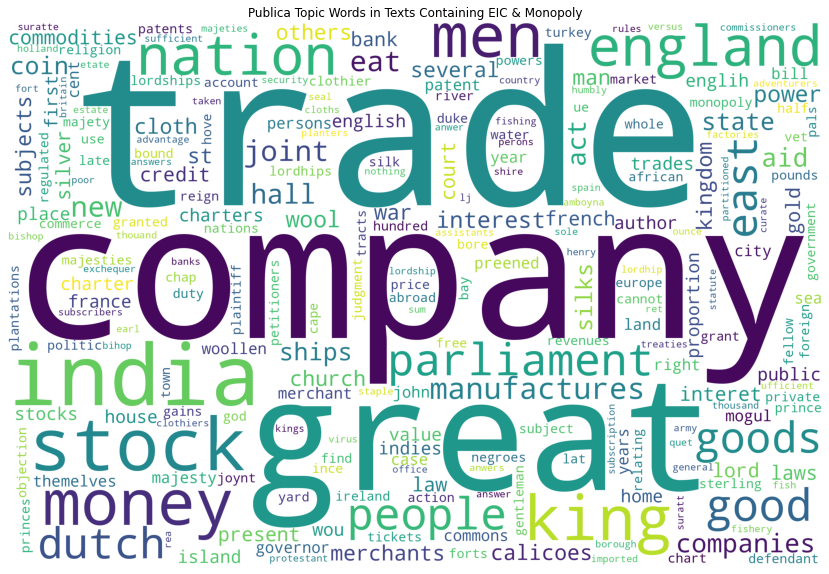

In [11]:
topicCloud('publica','eic_monopoly.txt','Publica Topic Words in Texts Containing EIC & Monopoly')

[('great', 218), ('trade', 204), ('company', 165), ('king', 132), ('india', 119), ('england', 87), ('stock', 73), ('money', 69), ('good', 66), ('nation', 64), ('men', 63), ('east', 58), ('parliament', 49), ('aid', 46), ('goods', 45), ('hall', 44), ('ships', 42), ('people', 42), ('majesty', 39), ('new', 36), ('dutch', 35), ('war', 34), ('act', 34), ('eat', 31), ('english', 31), ('court', 30), ('manufactures', 27), ('house', 26), ('french', 25), ('law', 25), ('interest', 25), ('kingdom', 25), ('lord', 24), ('john', 23), ('several', 23), ('general', 22), ('majety', 22), ('companies', 22), ('pounds', 22), ('bill', 22), ('persons', 21), ('man', 21), ('wool', 21), ('englih', 20), ('silks', 20), ('states', 19), ('william', 19), ('subjects', 19), ('years', 18), ('cent', 18), ('first', 18), ('hundred', 17), ('joint', 17), ('land', 17), ('others', 16), ('present', 16), ('coin', 15), ('france', 15), ('merchants', 15), ('year', 15), ('duke', 15), ('foreign', 15), ('prince', 14), ('st', 14), ('inte

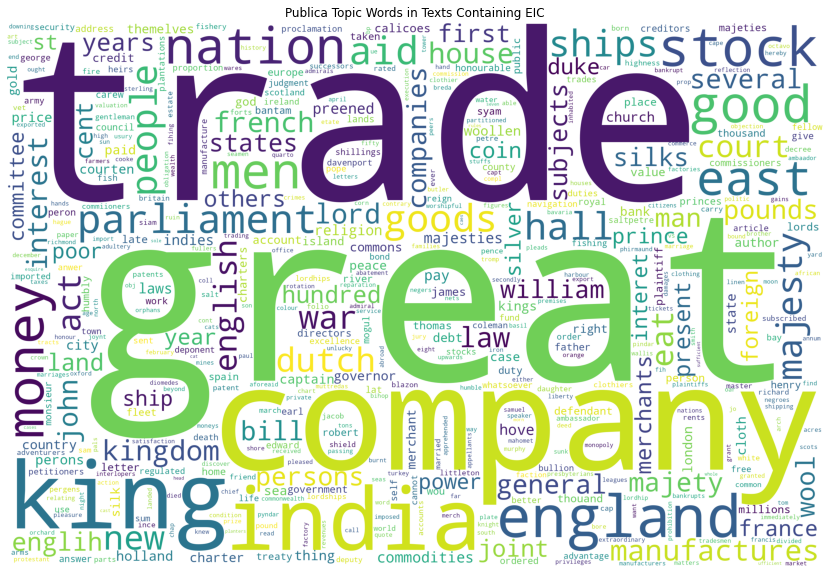

In [12]:
topicCloud('publica','eic.txt','Publica Topic Words in Texts Containing EIC')

[('men', 24), ('man', 24), ('great', 19), ('good', 16), ('love', 11), ('cannot', 9), ('world', 8), ('others', 8), ('hall', 7), ('things', 7), ('nature', 6), ('water', 6), ('way', 6), ('themelves', 5), ('nothing', 5), ('self', 5), ('half', 5), ('first', 5), ('wit', 4), ('either', 4), ('rather', 4), ('virtue', 4), ('face', 4), ('give', 4), ('wou', 3), ('ue', 3), ('honour', 3), ('duel', 3), ('trees', 3), ('neither', 3), ('ne', 3), ('er', 3), ('thing', 2), ('ut', 2), ('nec', 2), ('ad', 2), ('neqe', 2), ('vel', 2), ('pro', 2), ('mi', 2), ('est', 2), ('persons', 2), ('leat', 2), ('ounce', 2), ('oil', 2), ('ounces', 2), ('white', 2), ('together', 2), ('tree', 2), ('fruit', 2), ('sea', 2), ('palme', 2), ('nile', 2), ('ethiopia', 2), ('name', 2), ('least', 2), ('use', 2), ('drink', 2), ('fight', 2), ('roger', 2), ('enter', 2), ('peace', 2), ('humphrey', 2), ('shab', 2), ('women', 2), ('favour', 2), ('lover', 2), ('kindness', 2), ('ought', 2), ('life', 2), ('bub', 2), ('ant', 2), ('ruf', 2), ('s

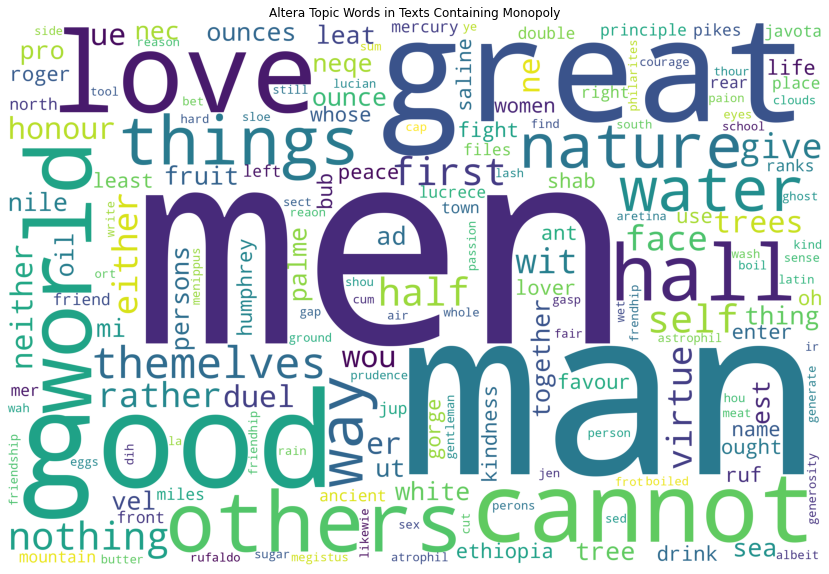

In [14]:
topicCloud('altera','monopoly.txt','Altera Topic Words in Texts Containing Monopoly')

[('great', 260), ('king', 257), ('men', 172), ('trade', 130), ('england', 119), ('people', 113), ('good', 108), ('parliament', 102), ('man', 94), ('hall', 91), ('company', 83), ('god', 81), ('law', 77), ('money', 69), ('power', 66), ('nation', 58), ('aid', 54), ('laws', 52), ('lord', 48), ('act', 46), ('first', 45), ('church', 45), ('india', 41), ('government', 40), ('kingdom', 38), ('public', 38), ('kings', 37), ('court', 34), ('house', 34), ('religion', 34), ('land', 32), ('prince', 30), ('stock', 29), ('queen', 29), ('english', 28), ('majesty', 26), ('manufactures', 25), ('others', 24), ('city', 24), ('bill', 24), ('case', 23), ('new', 23), ('right', 22), ('bank', 21), ('interest', 21), ('war', 21), ('france', 21), ('themelves', 20), ('french', 20), ('goods', 20), ('dutch', 20), ('state', 19), ('london', 18), ('things', 18), ('lords', 18), ('duke', 18), ('ireland', 17), ('ships', 17), ('commons', 17), ('hove', 16), ('year', 16), ('years', 16), ('subjects', 16), ('merchants', 16), ('

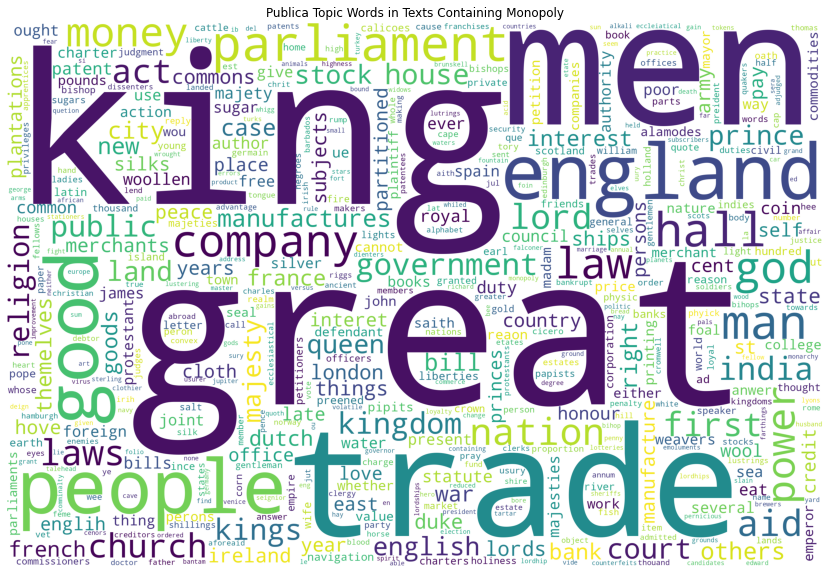

In [13]:
topicCloud('publica','monopoly.txt','Publica Topic Words in Texts Containing Monopoly')

In [ ]:
def examine(folder,f_name):
    txtFile = directory+'topic model/'+folder+'/'+f_name
    w = open(txtFile,'r')
    words = []
    for line in w.readlines():
        line = line.replace('\n','')
        newlist = line.split(' ')
        words.extend(newlist)

    unique = set()
    unique.update(words)

    m = ' '.join(medica.split('|'))
    r = ' '.join(religio.split('|'))
    p = ' '.join(publica.split('|'))
    a = []
    for word in unique:
        if (re.search(word,p)==None) and (re.search(word,r)==None) and (re.search(word,m)==None):
            a.append(word)
    w.close()
    print(a)

In [ ]:
examine('publica','eic.txt')

In [16]:
import pyLDAvis
import pyLDAvis.gensim_models

# Visualize the topic distributions within all the texts of a particular category (publica, religio, altera, or medica)
readFile = pd.read_csv('/home/rapiduser/Materials/topic model/publica/eic_monopoly.csv')
data = readFile.text.values.tolist()
data = remove_stopwords(data)

id2word = corpora.Dictionary(data)
corpus = [id2word.doc2bow(text) for text in data]
num_topics = 10
lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                        id2word=id2word,
                                        num_topics=num_topics)
pyLDAvis.enable_notebook()
LDAvis_prepared = pyLDAvis.gensim_models.prepare(lda_model, corpus, id2word)
pyLDAvis.save_html(LDAvis_prepared, '/home/rapiduser/ECBC-21-22/Image_Files/publica_eic_monopoly.html')
LDAvis_prepared


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
2      0.007605 -0.001145       1        1  22.287278
9     -0.005455 -0.002174       2        1  15.488036
6     -0.005288 -0.002427       3        1  13.328146
4     -0.001700 -0.002454       4        1  12.526989
8      0.000376  0.001916       5        1   9.001779
7     -0.000610  0.002066       6        1   8.705445
1     -0.000330  0.005392       7        1   8.012842
5     -0.000578  0.002415       8        1   4.289737
3      0.003850 -0.005114       9        1   3.344106
0      0.002130  0.001524      10        1   3.015641, topic_info=        Term         Freq        Total Category  logprob  loglift
467     king  7575.000000  7575.000000  Default  30.0000  30.0000
810    trade  9923.000000  9923.000000  Default  29.0000  29.0000
375    great  9132.000000  9132.000000  Default  28.0000  28.0000
152  company  5222.000000  5222.000000  Default  27.0000  27.0000
668    price  4416.000000  4416.000000  Default  26.0000  26.0000
..       ...          ...          ...      ...      ...      ...
890    years    77.665277  3202.472265  Topic10  -6.3622  -0.2179
519      man    78.133226  3315.523395  Topic10  -6.3562  -0.2466
559      new    71.078826  2645.158249  Topic10  -6.4508  -0.1153
194  country    72.881571  2978.239271  Topic10  -6.4258  -0.2089
594   others    70.973515  2779.608486  Topic10  -6.4523  -0.1664

[965 rows x 6 columns], token_table=       Topic      Freq  Term
term                        
33820      1  0.301952  abby
33820      2  0.150976  abby
33820      3  0.150976  abby
33820      4  0.150976  abby
33820      6  0.150976  abby
...      ...       ...   ...
31558      6  0.101382  zebe
31558      7  0.139401  zebe
31558      8  0.050691  zebe
31558      9  0.038018  zebe
31558     10  0.038018  zebe

[4897 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[3, 10, 7, 5, 9, 8, 2, 6, 4, 1])